In [34]:
%pylab inline
%matplotlib inline
import h5py
import numpy as np
import matplotlib.pyplot as plt
from numpy import *
from IPython.display import Image
from scipy.optimize import curve_fit
import glob

Populating the interactive namespace from numpy and matplotlib


/Users/batesjo/Desktop/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['mean']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [35]:
#finds the data folder to access data of azimuth
data_folder = 'sun_azimuth/'

az_files = glob.glob(data_folder + "sun*") #This command grabs all of the files starting with "sun_az" in your data folder.
az_files.sort()


In [36]:
#finds the data folder to access data of elevation
data_folder_el = 'sun_elevation/'

el_files = glob.glob(data_folder_el + "sun*")
el_files.sort()

In [37]:
az_spectra = [] # Create an empty array to later hold each of the spectra from the azimuthal scans

for az_file in az_files: #Pull each individual filename from the list of azimuth files
    
    with open(az_file) as az_data: #This opens up the file and puts each line into a list called az_data
        
        spectrum_rows = []    # We create a new empty list to put the rows with our spectral data into.
        
        for j, row in enumerate(az_data, start=1): # enumerate() works a lot like range(). You get an index (j, here) which is iterated over, but you also get an object (row) corresponding to the items in the list you're iterating over (that is, inside this loop, row is the same as az_data[j])
            if j%4 == 0: # The operator "%" is called the modulus. It returns the remainder of a division (e.g. 6%4=2). So, by checking when j%4 is zero, we get every fourth row in the data (which is where our spectral data is).
                spectrum_rows.append(row) # Throw every fourth row into our list of spectral data.
                
        tot_spectrum = np.zeros(1024) #Create an array of 1024 0's.
        for row in spectrum_rows: 
            temp_spec = row.split(' ') # Our rows are actually strings. To break them up, we use the split() command, which splits a string into a list by grabbing each segment separated by the delimiter you put in the parentheses (e.g. If you do 'abc def ghi'.split(' '), you'll get the list [abc,def,ghi])
            spec = [] # Create an empty list to hold the spectral data
            for val in temp_spec: # Iterate over the elements of your split list.
                if val != '' and val != '\n': # This excludes some "nonsense" cases where elements in your split list are empty strings or end-of-line characters
                    spec.append(val) #Throw the values that are actually fluxes into your spectrum array.
                    
                    
            tot_spectrum = tot_spectrum + np.float64(spec) # Add the data from the current row to your total spectral data for this file.
            
        az_spectra.append(tot_spectrum)

az_spectra_flux = []

Text(0.5,1,'Spectrum of sun azimuth')

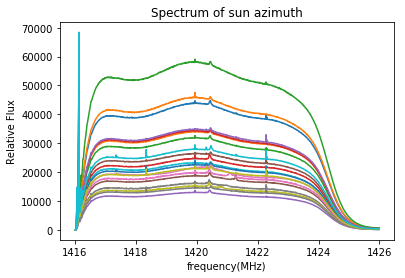

In [47]:
#spikes can be from radio experience
frequency = np.arange(1416,1426,.009766)
for i in range(0,20):
    plt.plot(frequency,az_spectra[i])
    
plt.xlabel('frequency(MHz)')
plt.ylabel('Relative Flux')
plt.title('Spectrum of sun azimuth')


Text(0.5,1,'Sun data of azimuth')

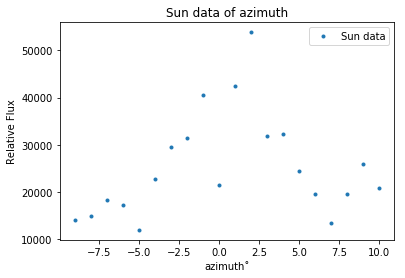

In [39]:
#plot of just the sun data azimuth
azimuth = [-1,-2,-3,-4,-5,-6,-7,-8,-9,0,10,1,2,3,4,5,6,7,8,9]
flux = []
for i in range(0,20):
    flux.append(np.asarray(az_spectra[i][100:700]).mean())
plt.plot(azimuth,flux,".",label = 'Sun data')
plt.xlabel('azimuth˚')
plt.ylabel('Relative Flux')
plt.legend()
plt.title('Sun data of azimuth')

6.377942754630271
Full width half max of azimuth =  15.018907444663272


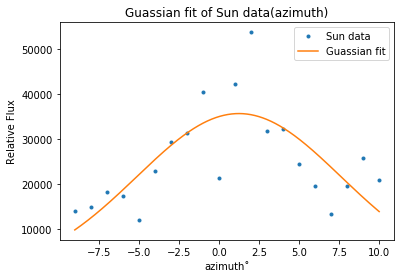

In [40]:
#calculates a gaussian fit for the data
a = 100
x0 = 7
mean = 1.24
sigma = 6.3
az = np.linspace(-9,10,1000)
def gauss_function(az, a, x0, sigma):
    return a*np.exp(-(az-x0)**2/(2*sigma**2))
popt, pcov = curve_fit(gauss_function, azimuth, flux, p0 = [1, mean, sigma])
plt.plot(azimuth,flux,".", label = 'Sun data')
plt.plot(az, gauss_function(az, *popt), label='Guassian fit')

plt.xlabel('azimuth˚')
plt.ylabel('Relative Flux')
plt.legend()
plt.title('Guassian fit of Sun data(azimuth)')
print(popt[2])

FWHM_az = 2*popt[2]*np.sqrt(2*log(2))
print('Full width half max of azimuth = ', FWHM_az)

In [41]:
el_spectra = [] # Create an empty array to later hold each of the spectra from the azimuthal scans

for el_file in el_files: #Pull each individual filename from the list of azimuth files
    
    with open(el_file) as el_data: #This opens up the file and puts each line into a list called az_data
        
        spectrum_rows = []    # We create a new empty list to put the rows with our spectral data into.
        
        for j, row in enumerate(el_data, start=1): # enumerate() works a lot like range(). You get an index (j, here) which is iterated over, but you also get an object (row) corresponding to the items in the list you're iterating over (that is, inside this loop, row is the same as az_data[j])
            if j%4 == 0: # The operator "%" is called the modulus. It returns the remainder of a division (e.g. 6%4=2). So, by checking when j%4 is zero, we get every fourth row in the data (which is where our spectral data is).
                spectrum_rows.append(row) # Throw every fourth row into our list of spectral data.
                
        tot_spectrum = np.zeros(1024) #Create an array of 1024 0's.
        for row in spectrum_rows: 
            temp_spec = row.split(' ') # Our rows are actually strings. To break them up, we use the split() command, which splits a string into a list by grabbing each segment separated by the delimiter you put in the parentheses (e.g. If you do 'abc def ghi'.split(' '), you'll get the list [abc,def,ghi])
            spec = [] # Create an empty list to hold the spectral data
            for val in temp_spec: # Iterate over the elements of your split list.
                if val != '' and val != '\n': # This excludes some "nonsense" cases where elements in your split list are empty strings or end-of-line characters
                    spec.append(val) #Throw the values that are actually fluxes into your spectrum array.
                    
                    
            tot_spectrum = tot_spectrum + np.float64(spec) # Add the data from the current row to your total spectral data for this file.
            
        el_spectra.append(tot_spectrum)
el_spectra_flux = []

Text(0.5,1,'Frequency of the Sun(elevation)')

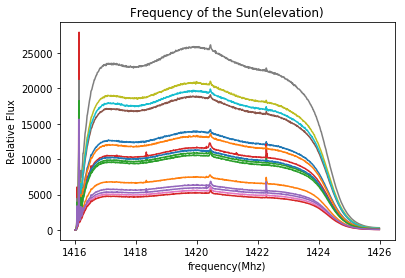

In [48]:
#plots the spectrum of the sun
elevation = [-1,-2,-3,-4,-5,1,10,2,3,4,5,6,7,8,9]
#spikes can be from radio interference
#frequency range
frequency = np.arange(1416,1426,.009766)
for i in range(0,15):
    plt.plot(frequency,el_spectra[i],label = 'spectrum of ' + str(i))
    
plt.xlabel('frequency(Mhz)')
plt.ylabel('Relative Flux')
plt.title('Frequency of the Sun(elevation)')
#plt.legend()

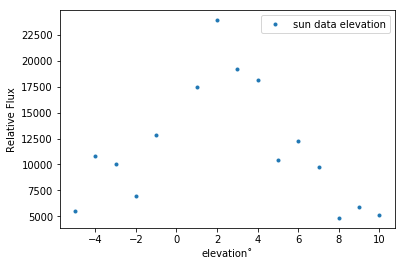

In [49]:
#plots just the sun datas elevation
flux_el = []
for i in range(0,15):
    flux_el.append(np.asarray(el_spectra[i][100:700]).mean())
plt.plot(elevation,flux_el,".",label = 'sun data elevation')
plt.xlabel('elevation˚')
plt.ylabel('Relative Flux')
plt.legend()

4.173969103689341
Full width half max of elevation =  9.828946112707525


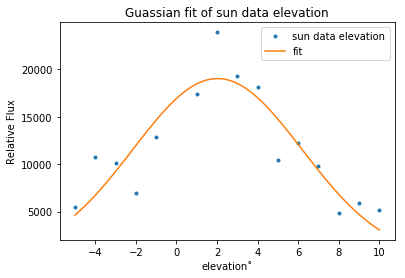

In [44]:

#creates Guassian function with the parameters
a = 100
x0 = 7
mean = 2
sigma = 4.17
el = np.linspace(-5,10,100)
def gauss_function(el, a, x0, sigma):
    return a*np.exp(-(el-x0)**2/(2*sigma**2))
popt_el, pcov_el = curve_fit(gauss_function, elevation, flux_el, p0 = [1, mean, sigma])
#plots the graph
plt.plot(elevation,flux_el,".", label = 'sun data elevation')
plt.plot(el, gauss_function(el, *popt_el), label='fit')

plt.xlabel('elevation˚')
plt.ylabel('Relative Flux')
plt.legend()
plt.title('Guassian fit of sun data elevation')
print(popt_el[2])
#calculates full width half max
FWHM_el = 2*popt_el[2]*np.sqrt(2*log(2))
print('Full width half max of elevation = ', FWHM_el)

In [45]:
#calculate diffraction limit and angular size of the sun and compare to actual
#errors can be from not exact 1˚ when moving and radio interference
#diameter of telescope is 2.1cm use 1.22 * wavelength/Diameter and that is in radians convert to degrees
#angular size of sun is about .5 degrees
#if above diffraction limit it is bad should be smaller
#get half power fourier transform should be about 7˚ with 20% increase so it goes down to 5˚